## Shreyas, Maleeha, Payal, Benhur, Jayden

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/kaggle/input/airports.csv
/kaggle/input/airlines.csv
/kaggle/input/flights.csv


## Reading in the 3 datasets

In [2]:
airports = pd.read_csv("../input/airports.csv")
airlines = pd.read_csv("../input/airlines.csv")
flights = pd.read_csv("../input/flights.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.



## Lets view each dataset

In [3]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [4]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [5]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
airports = airports.dropna(subset = ['LATITUDE', 'LONGITUDE'])

In [7]:
flights_data1 = flights.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])


In [8]:
flights_data1_nonulls = flights_data1.dropna(subset = ["AIR_SYSTEM_DELAY", "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"])
flights_data1_nonulls = flights_data1_nonulls.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [9]:
flights_delays = flights_data1_nonulls

In [10]:
flights_data2 = flights_data1.drop(['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], axis=1)


## Changing the time into a readable format

In [11]:
import datetime, warnings
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [12]:
flights_data2['DATE']=pd.to_datetime(flights_data2[['DAY', 'MONTH', 'YEAR']])

In [13]:
flights_data2['DAY'] = flights_data2['DATE'].dt.weekday_name

In [14]:
flights_data2['MONTH'] =flights_data2['DATE'].dt.month_name

In [15]:
flights_data2['SCHEDULED_DEPARTURE_TIME'] = flights_data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)

In [16]:
flights_data2['ACTUAL_DEPARTURE_TIME'] = flights_data1['DEPARTURE_TIME'].apply(Format_Hourmin)

In [17]:
flights_data2['SCHEDULED_ARRIVAL_TIME'] = flights_data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)

In [18]:
flights_data2['ACTUAL_ARRIVAL_TIME'] = flights_data1['ARRIVAL_TIME'].apply(Format_Hourmin)

In [19]:
flights_data2['DEPARTURE_DELAY'] = flights_data2['DEPARTURE_DELAY'].abs()

In [20]:
flights_data2['ARRIVAL_DELAY'] = flights_data2['ARRIVAL_DELAY'].abs()

In [21]:
flights_data2 = flights_data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [22]:
flights_data2 = flights_data2.drop(["AIRLINE_x", "IATA_CODE"],axis=1)

In [23]:
flights_data2 = flights_data2.rename(columns = {"AIRLINE_y": "AIRLINE"})

In [24]:
flights_data2 = flights_data2.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how="inner")
flights_data2 =  flights_data2.merge(airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how="inner")

In [25]:
flights_data2 = flights_data2.drop(['COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x', 'STATE_y', 'COUNTRY_y', 'STATE_x', 'LATITUDE_y', 'LONGITUDE_y'], axis=1)

In [26]:
flights_data2 = flights_data2.rename(columns={'IATA_CODE_x':'DEPARTURE_AIRPORT_CODE', 'AIRPORT_x':'DEPARTURE_AIRPORT', 'CITY_x':'DEPARTURE_CITY', 
                                              'IATA_CODE_y':'ARRIVAL_AIRPORT_CODE', 'AIRPORT_y':'ARRIVAL_AIRPORT', 'CITY_y':'ARRIVAL_CITY'})

In [27]:
flights_cleaned_data = pd.DataFrame(flights_data2[['AIRLINE', 'DEPARTURE_AIRPORT', 'DEPARTURE_CITY',
                                          'ARRIVAL_AIRPORT', 'ARRIVAL_CITY', 'ORIGIN_AIRPORT',
                                          'DESTINATION_AIRPORT', 'DISTANCE', 'ACTUAL_DEPARTURE_TIME', 'DATE', 'DAY',
                                          'MONTH', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'ACTUAL_ARRIVAL_TIME',
                                          'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN',
                                          'TAXI_OUT', 'DIVERTED']])

In [28]:
flights_cleaned_data = flights_cleaned_data.dropna(subset=['ACTUAL_DEPARTURE_TIME', 'ACTUAL_ARRIVAL_TIME'])

In [29]:
flight_info = flights_cleaned_data

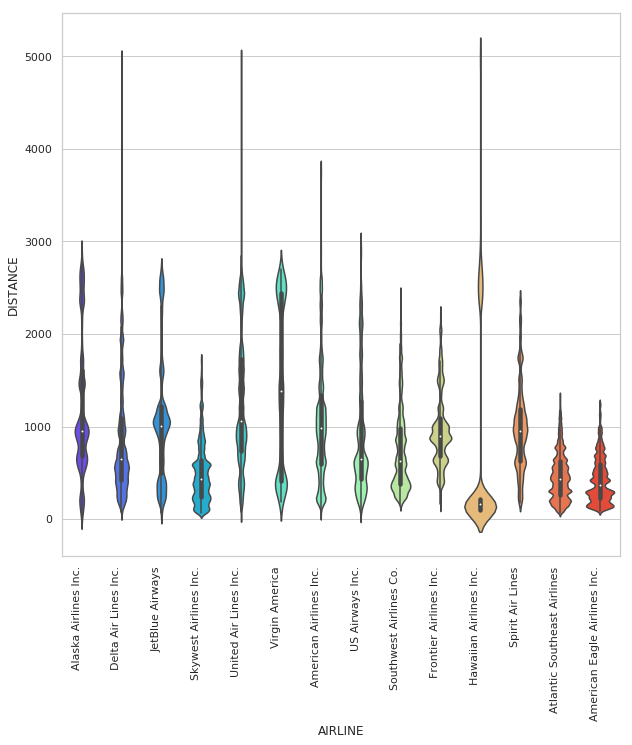

In [30]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
axis = sns.violinplot(x='AIRLINE', y='DISTANCE', data = flight_info, palette='rainbow')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.show()

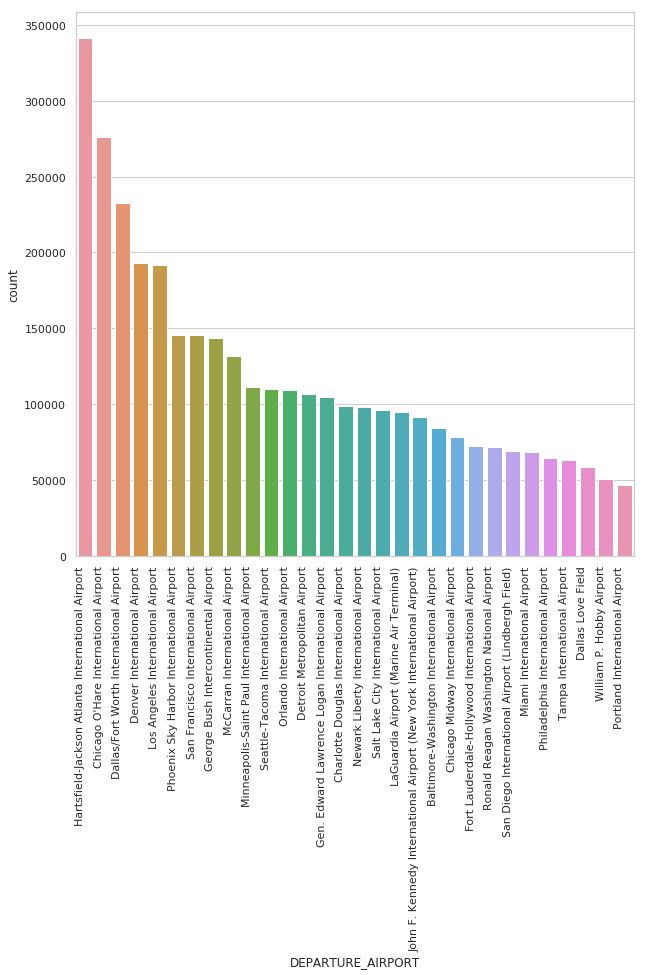

In [31]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
axis = sns.countplot(x='DEPARTURE_AIRPORT', data = flight_info, order = flight_info['DEPARTURE_AIRPORT'].value_counts().iloc[:30].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.show()

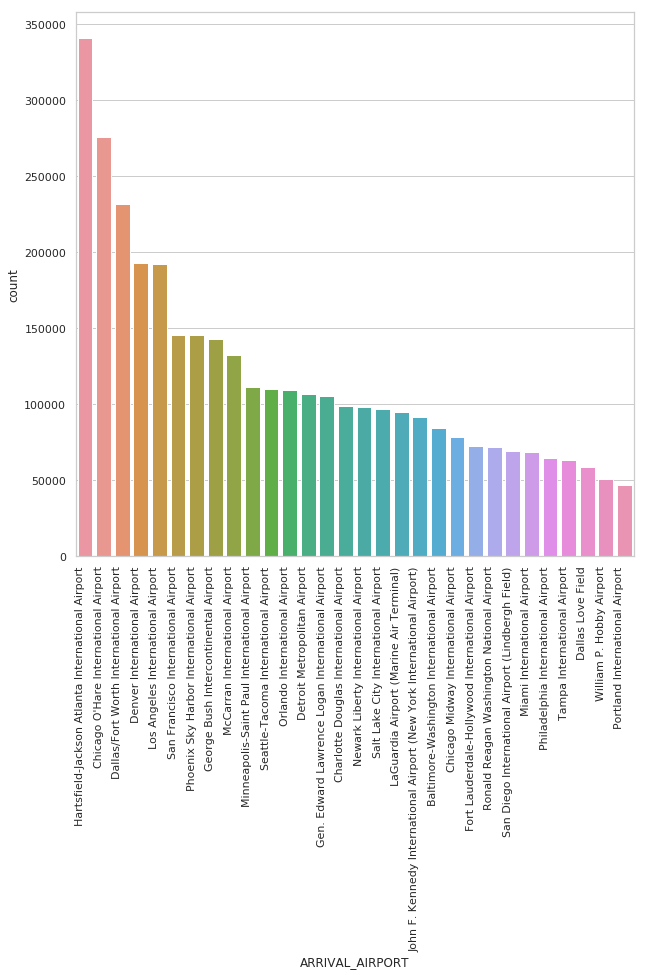

In [32]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,10))
axis = sns.countplot(x='ARRIVAL_AIRPORT', data = flight_info, order = flight_info['ARRIVAL_AIRPORT'].value_counts().iloc[:30].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.show()

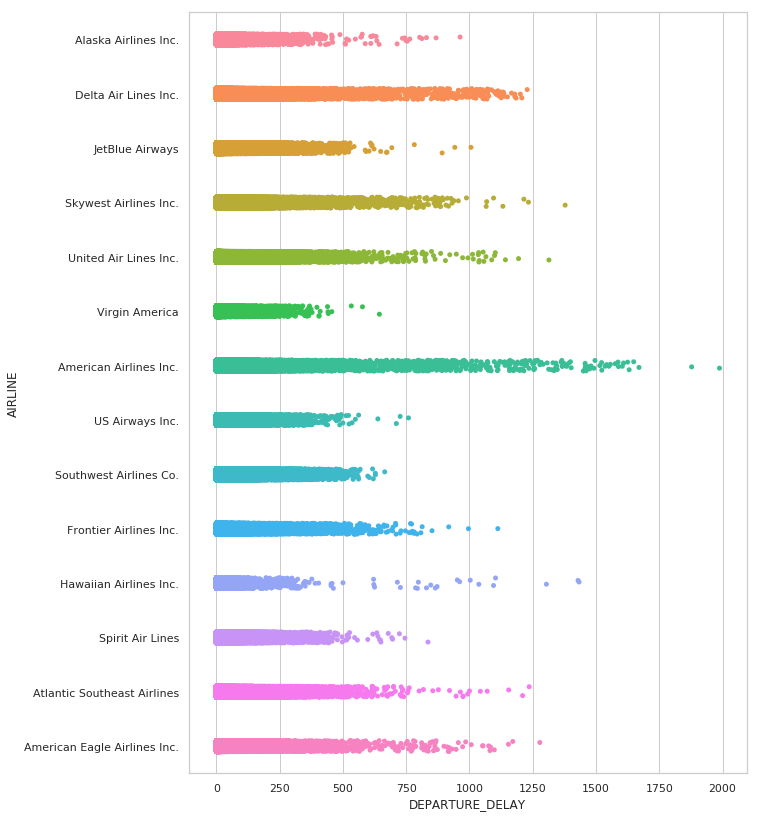

In [33]:
plt.subplots(figsize=(10,14))
sns.stripplot(x='DEPARTURE_DELAY', y='AIRLINE', data=flight_info, dodge=True, jitter=True)
plt.show()

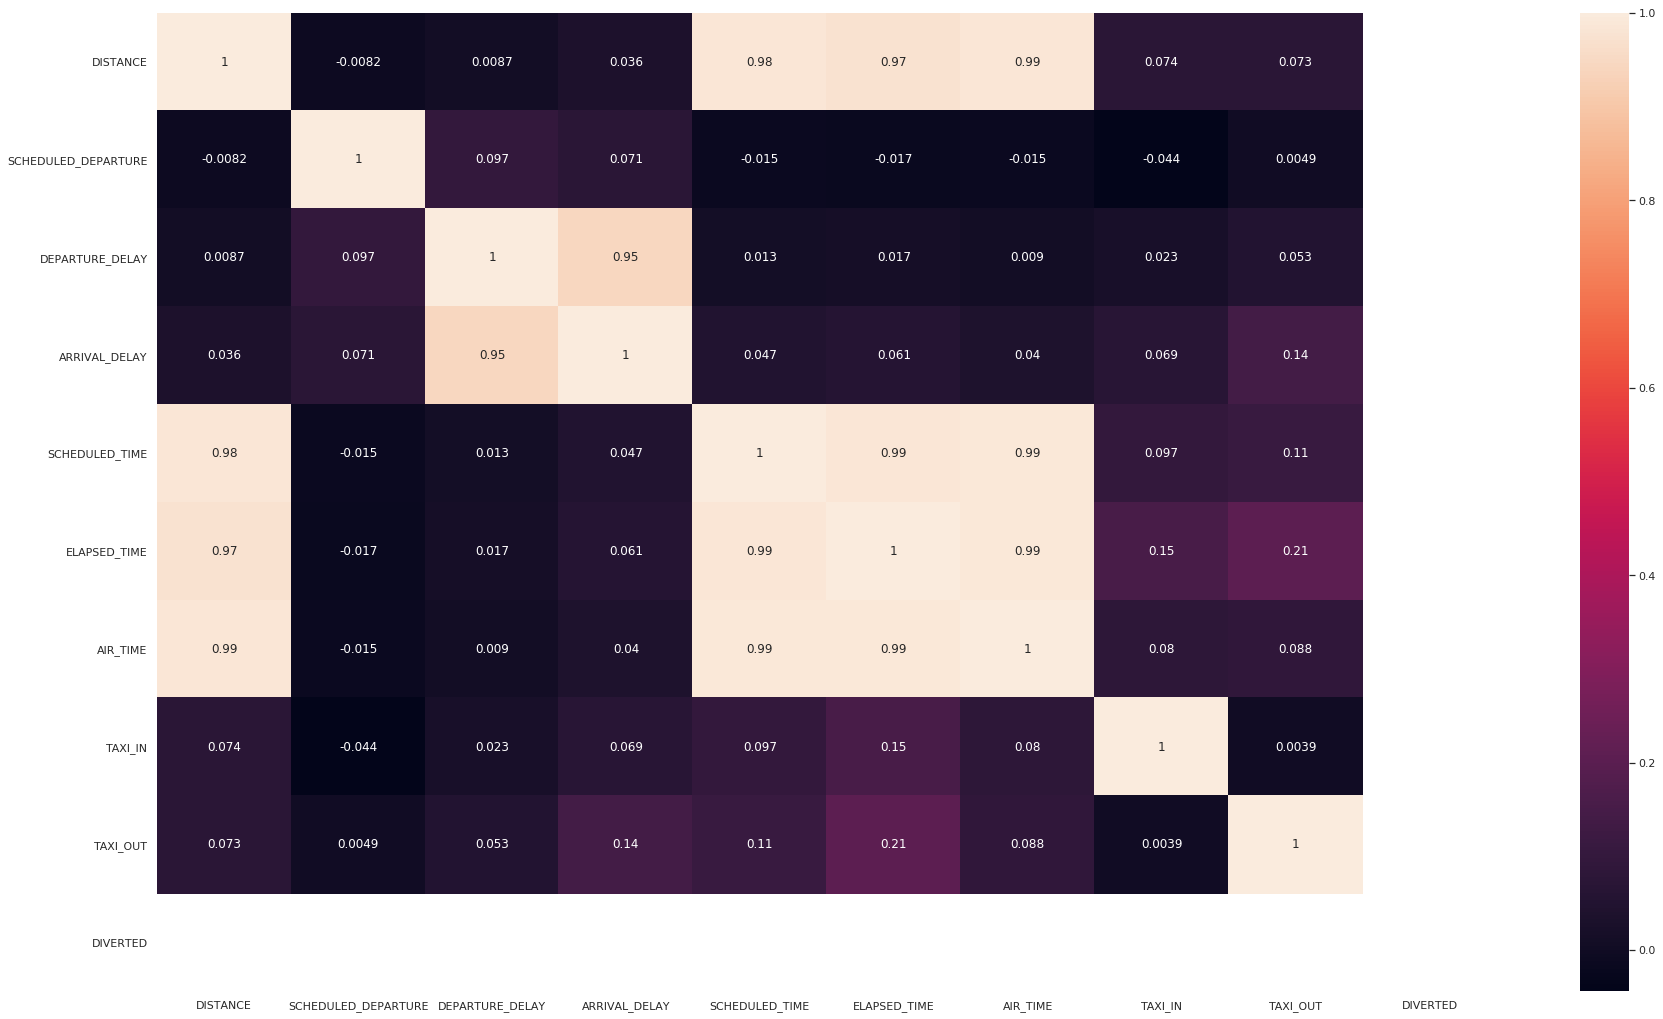

In [34]:
plt.subplots(figsize=(30,18))
delay_correlation = flight_info.corr()
sns.set_color_codes("bright")
sns.heatmap(delay_correlation, annot=True)
plt.show()

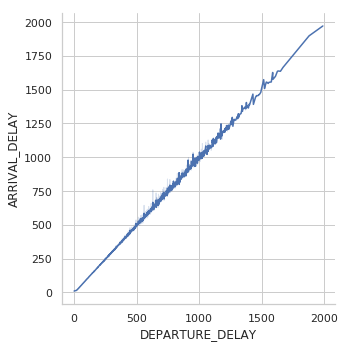

In [35]:
sns.relplot(x='DEPARTURE_DELAY', y="ARRIVAL_DELAY", kind="line", data=flight_info)